In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from pylab import rcParams

In [2]:
%matplotlib inline

In [37]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [42]:
def fib(n):
    a, b = 0, 1
    for i in range(0, n):
        a, b = b, a + b
    return a

def xp_for_level(level):
    if level <= 1:
        return 0
    return (10 * fib(level) + 1) + xp_for_level(level - 1)

In [56]:
data = {n: xp_for_level(n) for n in range(1, 21)}.items()

In [57]:
df = pd.DataFrame(list(data), columns=["level", "xp"])

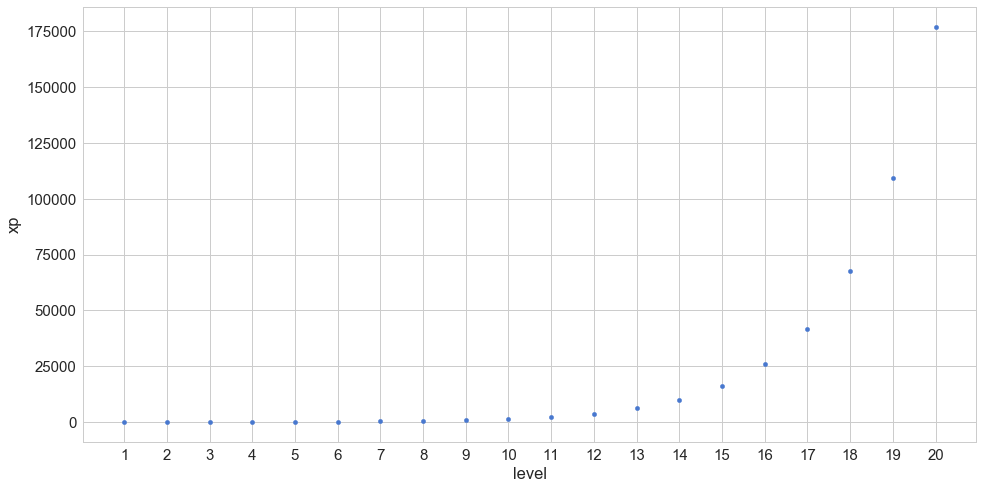

In [58]:
df.plot(kind='scatter', x='level', y='xp', xticks=df.level);

In [53]:
XP_BONUS_MULTIPLIER = 1.2

# Quest bonus

In [64]:
def xp_for_quest():
    rewards = [5, 10, 15, 20, 30]
    most_important_bonus = 2 if random.random() >= 0.5 else 1
    return random.choice(rewards) * XP_BONUS_MULTIPLIER * most_important_bonus

In [83]:
q_xps = [xp_for_quest() for _ in range(10000)]

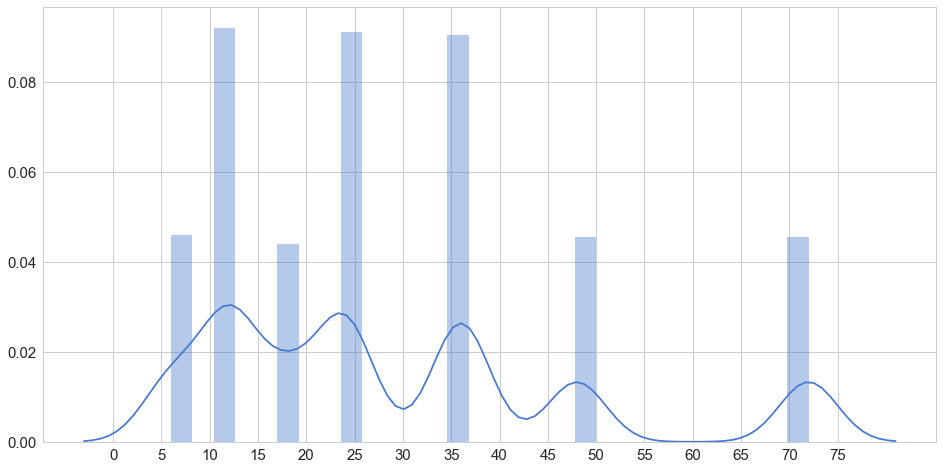

In [84]:
fig = sns.distplot(q_xps);
plt.xticks(range(0, 80, 5));

# Daily challenge bonus

In [82]:
def xp_daily_challenge():
    rewards = [20, 30, 50, 80, 100]
    return random.choice(rewards) * XP_BONUS_MULTIPLIER

In [85]:
dc_xps = [xp_daily_challenge() for _ in range(10000)]

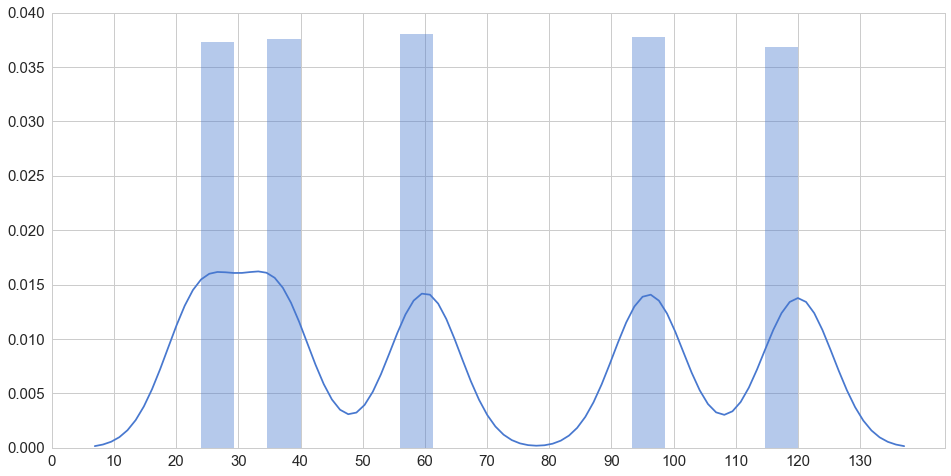

In [88]:
fig = sns.distplot(dc_xps);
plt.xticks(range(0, 140, 10));

# Challenge bonus

In [89]:
def xp_challenge():
    rewards = [40, 60, 100, 160, 200]
    difficulty = random.choice([2, 3, 3, 4])
    return random.choice(rewards) * difficulty * XP_BONUS_MULTIPLIER

In [90]:
c_xps = [xp_challenge() for _ in range(10000)]

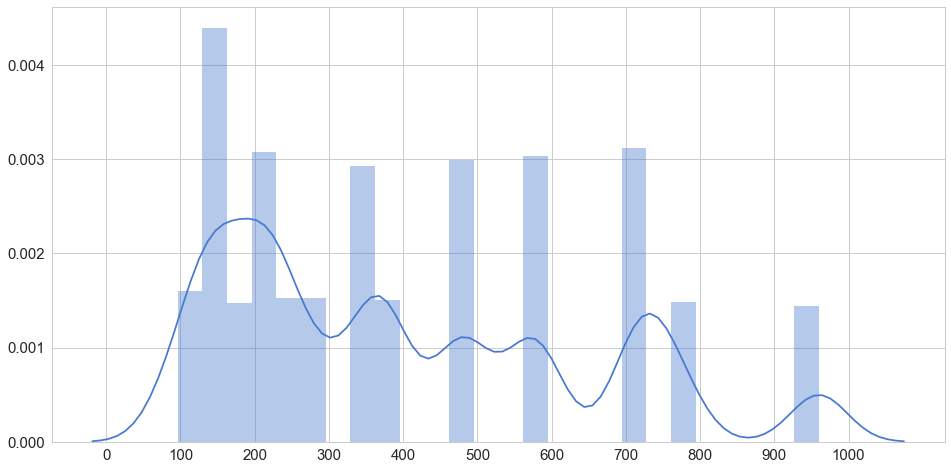

In [93]:
fig = sns.distplot(c_xps);
plt.xticks(range(0, 1100, 100));

# Daily XP

In [121]:
def daily_xp():
    completed_quests = random.choices(
        list(range(1, 9)), 
        [.05, .05, 0.1, 0.4, .05, .05, .05, .05], 
        k = 1
    )[0]
    total_xp = sum([xp_for_quest() for _ in range(completed_quests)])
    if random.random() <= 0.35:
        total_xp += xp_daily_challenge()
    if random.random() <= 0.05:
        total_xp += xp_challenge()
    return total_xp

In [132]:
daily_xps = [daily_xp() for _ in range(100000)]

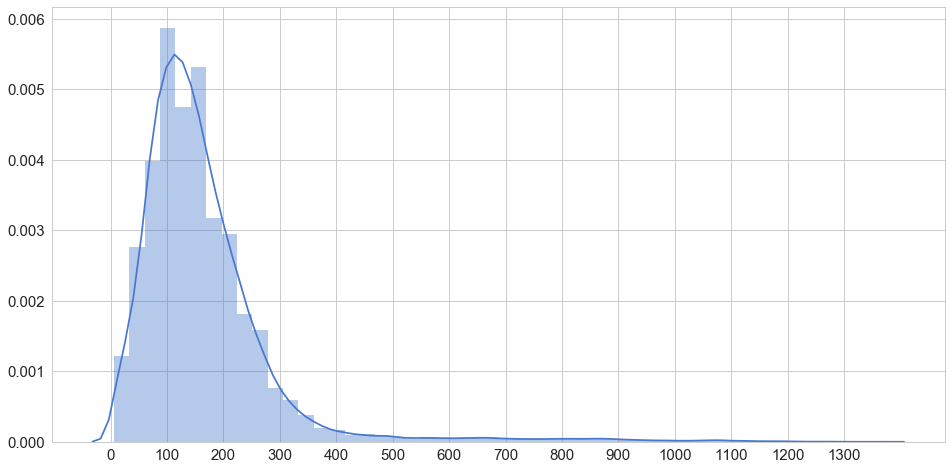

In [133]:
fig = sns.distplot(daily_xps);
plt.xticks(range(0, 1400, 100));

# Simulate leveling up

In [171]:
level = 1
level_ups = {}
total_xp = 0
for d in range(1, 50 * 365): # 50 years
    xp = daily_xp()
    while xp_for_level(level + 1) < total_xp + xp:
        level += 1
        level_ups[level] = d
    total_xp += xp

In [172]:
level_intervals = {1: 0}
for k, v in level_ups.items():
    if k == 2:
        level_intervals[k] = v - 1
    else:
        level_intervals[k] = v - level_ups[k - 1] 

In [175]:
intervals_df = pd.DataFrame(list(level_intervals.items()), columns=["level", "days_interval"])

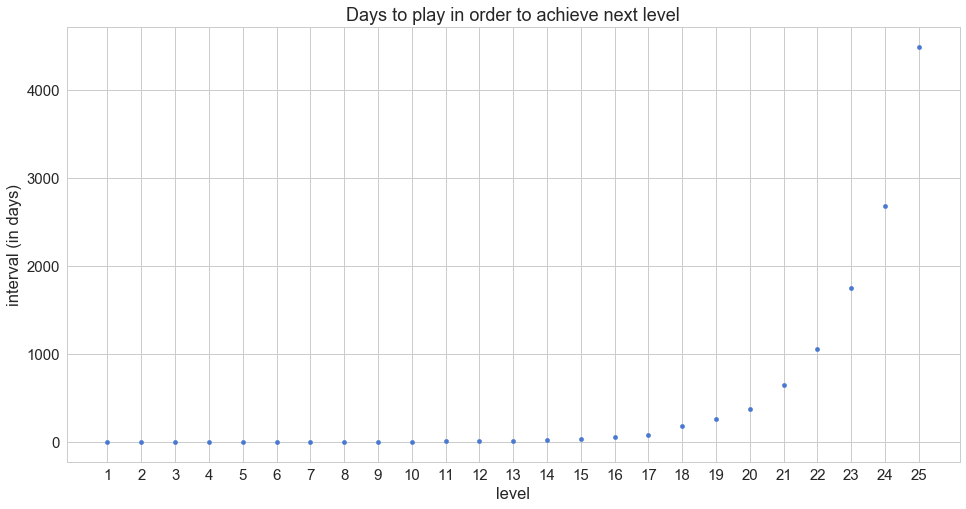

In [186]:
ax = intervals_df.plot(
    kind='scatter',
    x='level', 
    y='days_interval',
    xticks=intervals_df.level, 
    title="Days to play in order to achieve next level"
)
ax.set_ylabel("interval (in days)");